c:\users\inkin-n\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\inkin-n\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\inkin-n\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\inkin-n\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature name

Coefficients for Y: MSE =  80.23398539000894 R² =  0.4863696280307911
w0 =  -1.726240680212764
w1 =  -0.8839017438461982
w2 =  -0.6990878410817897
w3 =  7.830099492020201
w4 =  -11.934887711410008
w5 =  -11.534037595335278
w6 =  38.51983577597743
Gradient descent


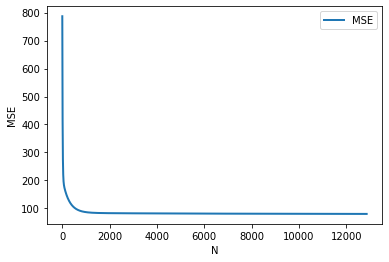

-----------------------
L2 regularization for Y
Coefficients for Y: MSE =  83.64343503434567 R² =  0.6075483794938421 L =  0.01
w0 =  -1.6209382288626029
w1 =  -1.4006930937240611
w2 =  -2.7018572231948674
w3 =  -0.025718031763182672
w4 =  -3.2333926423717503
w5 =  -3.744124396527779
w6 =  34.27718752400094
Gradient descent


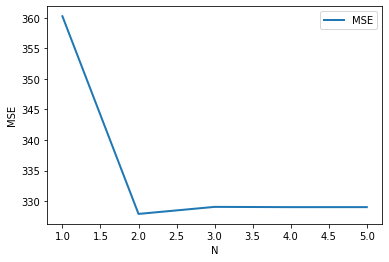

-----------------------
Coefficients with multi-start for Y: MSE =  80.23396890960443 R² =  0.4863680385915764
w0 =  -1.7262320267142905
w1 =  -0.88388840598105
w2 =  -0.6990550199202188
w3 =  7.830193562587652
w4 =  -11.934987394249315
w5 =  -11.534121041194506
w6 =  38.51984520398126
Gradient descent


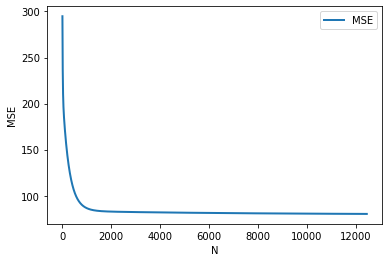

-----------------------
SKKLEARN:
For Y R² =  0.6755074855579912

With L2 regularization Y R² = 
For Y R² =  0.6403827154295514



In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import numpy
import math
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt


def skklearnLinearRegress(x, y, isL2 = False):
    x = x.to_numpy()
    y = y.to_numpy()
    
    Y = y

    if(isL2):
        reg = Ridge(alpha=1.0).fit(x, Y)
        print(f'With L2 regularization Y R\u00B2 = ')
    else:   
        reg = LinearRegression().fit(x, Y)
    print(f'For Y R\u00B2 = ', reg.score(x, Y))
    print()
def showGraph(values1, param="N"):
    x = []
    for i in range(len(values1)):
        x.append((i+1))
    plt.plot(x, values1, linewidth=2.0, label="MSE")
    plt.xlabel(param)
    plt.ylabel('MSE')
    plt.legend()
    plt.show()
def showKoef(koefs):
    i = 0
    for elem in koefs:
        print(f'w{i} = ', elem)
        i+=1
def normalizeData(dataSet):
    normalizer = MinMaxScaler()
    dataSet = normalizer.fit_transform(dataSet)
    return pd.DataFrame(data=dataSet)
def readData():
    data = pd.read_csv("resources/yacht_hydrodynamics_cs.data", header = None, sep = ",")
    trainData = data.iloc[:270,:]
    testData = data.iloc[270:,:]
    trainY = trainData[[6]]
    testY = testData[[6]]
    
    trainData = trainData.drop([6], axis=1)
    testData = testData.drop([6], axis=1)
    
    trainData.insert(0, "w0", numpy.random.rand(len(trainData.index)))
    testData.insert(0, "w0", numpy.random.rand(len(testData.index)))
    return [normalizeData(trainData), normalizeData(testData), trainY, testY]


def L2reg(learningRate, koeffs, trainData, trainY):
    minMSE = math.inf
    bestKef = koeffs
    bestL = math.inf
    l = [0.01, 0.1, 0.5, 1, 3, 9, 50]
    for i in range(len(l)):
        koefsWithL, MSE, errors = gradienDescent(learningRate, koeffs, trainData, trainY, True, l[i])
        if(MSE < minMSE):
            minMSE = MSE
            bestKef = koefsWithL
            bestL = l[i]
    return [bestKef, minMSE, bestL, errors]
def calcR2(x, y, koeffs):
    x = x.to_numpy()
    y = y.to_numpy()
    
    Y = y
    return r2_score(Y, numpy.dot(x, koeffs))
def calcMSE(x,k,y):
    return numpy.square(numpy.dot(x,k) - y).mean()
def calcGradient(trainData, prediction, y):
    return (2/len(trainData))*trainData.T.dot(prediction - y)
def distance(v1, v2):
    return numpy.sqrt(numpy.sum((v1 - v2) ** 2))
 
def multistartGradientDescent(n, learningRate, trainData, trainY, dott = 100):
    globalBestKef  = 0
    MSE = math.inf
    trainY_ = trainY.to_numpy()
    trainData_ = trainData.to_numpy()
    for i in range(dott):
        numpy.random.seed(i)
        koeffs_ = numpy.random.random(n)
        localBestKef, MSElocal, errors = gradienDescent(learningRate, koeffs_, trainData, trainY)
        if(MSElocal < MSE):
            MSE = MSElocal
            globalBestKef = localBestKef
    return [globalBestKef, MSE, errors]
def gradienDescent(learningRate, koeffs, trainData, trainY, L2 = False, lc = 0):
    trainData = trainData.to_numpy()
    trainY = trainY[6].to_list()
    EPS = 0.001
    Y = numpy.array(trainY)
    oldkoeffs = numpy.ones(len(koeffs), dtype=numpy.int8)
    koeffs = numpy.array(koeffs)
    errors = []
    while(distance(koeffs, oldkoeffs) > EPS):
        prediction = numpy.dot(trainData,koeffs)
        if(L2):
            gradient = (2/len(trainData))*trainData.T.dot(prediction - Y) + lc*2*numpy.array(koeffs)
        else:
            gradient = (2/len(trainData))*trainData.T.dot(prediction - Y)
        oldkoeffs = koeffs
        koeffs = koeffs - learningRate*gradient 
        errors.append(calcMSE(trainData,koeffs,Y))
    return [koeffs, calcMSE(trainData,koeffs,Y), errors]

def main():
    trainData, testData, trainY, testY = readData()
    koeffs = []
    for i in range(len(trainData.columns)):
        koeffs.append(10)

    
    
    oneKoefs, MSE1, errors = gradienDescent(0.01, koeffs, trainData, trainY, False)
    print("Coefficients for Y:", "MSE = ", MSE1, "R\u00B2 = ", calcR2(testData, testY, oneKoefs))
    showKoef(oneKoefs)
    print(f'Gradient descent')
    showGraph(errors)
    print(f'-----------------------')
    print(f'L2 regularization for Y')
    
    koeffsWithL2Y1, MSEL2Y1, Lkef1, errors = L2reg(0.01, koeffs, trainData, trainY)
    print("Coefficients for Y:", "MSE = ", MSEL2Y1, "R\u00B2 = ", calcR2(testData, testY, koeffsWithL2Y1), "L = ", Lkef1)
    showKoef(koeffsWithL2Y1)
    print(f'Gradient descent')
    showGraph(errors)
    
    print(f'-----------------------')
    oneMultiKoefs, MSE1multi, errors = multistartGradientDescent(len(koeffs), 0.01, trainData, trainY ,100)
    print("Coefficients with multi-start for Y:", "MSE = ", MSE1multi, "R\u00B2 = ", calcR2(testData, testY, oneMultiKoefs))
    showKoef(oneMultiKoefs)
    print(f'Gradient descent')
    showGraph(errors)
    
    print(f'-----------------------')
    print("SKKLEARN:")
    skklearnLinearRegress(testData, testY)
    skklearnLinearRegress(testData, testY, True)



main()

    